In [63]:
midi_files = ['/Users/caslabs/Documents/labs/APPLYAI/music-generation/example_notebooks/multi-model/energetic_edm_track.mid', 
              '/Users/caslabs/Documents/labs/APPLYAI/music-generation/example_notebooks/multi-model/gentle_piano_piece.mid', 
              '/Users/caslabs/Documents/labs/APPLYAI/music-generation/example_notebooks/multi-model/lively_jazz_trio.mid']
text_captions = ['an evil sinister uprising', 'happy sunset over the beach', 'melochony of the forgotten']

In [64]:
import os
os.chdir('../../')

In [95]:
from utils.musicautobot.numpy_encode import *
from utils.musicautobot.config import *
from utils.musicautobot.music_transformer import *
from utils.musicautobot.multitask_transformer import *
from utils.musicautobot.utils import midifile

tokenized_midis = []

for midi_file in midi_files:
    # Load the MIDI file as a music21 stream
    mf = midifile.file2mf(midi_file); mf
    print(mf)
    stream = file2stream(mf)
    chordarr = stream2chordarr(stream)
    ts1 = chordarr[0].nonzero()
    c = music21.chord.Chord(ts1[1].tolist());
    # sub-string to chord symbols


    # Convert to string representation
    #tokenized_midi_list = music21.chord.Chord(chordarr[0]).to_text()

    # Convert the stream to a chord array using MusicAutobot
    #chord_arr = stream2chordarr(stream)
    
    # Convert the chord array to a numpy encoding
    #tokenized_midi = chordarr2npenc(chord_arr)
    
    # Convert the tokenized MIDI to a list of integers
    #tokenized_midis.append(tokenized_midi_list)

<music21.midi.MidiFile 3 tracks>


/Users/caslabs/Documents/labs/APPLYAI/music-generation/utils/musicautobot/numpy_encode.py:53: StreamIteratorInefficientWarning: highestTime is not defined on StreamIterators. Call .stream() first for efficiency
  highest_time = max(s.flat.getElementsByClass('Note').highestTime, s.flat.getElementsByClass('Chord').highestTime)


AttributeError: 'Chord' object has no attribute 'filter'

In [94]:
import pandas as pd

data = {'text': text_captions, 'midi': tokenized_midis}
df = pd.DataFrame(data)

ValueError: All arrays must be of the same length

In [67]:
# convert to string
df['midi'] = df['midi'].apply(lambda x: ''.join([str(elem) for elem in x]))

In [68]:
df

,text,midi
0,an evil sinister uprising,xxbos xxpad n67 d1 n55 d3 n50 d3 n48 d3 xxsep ...
1,happy sunset over the beach,xxbos xxpad n87 d1 n85 d1 n82 d1 n78 d1 n42 d4...
2,melochony of the forgotten,xxbos xxpad n60 d4 n57 d4 n53 d4 xxsep d4 n60 ...


In [69]:
data = [(text, midi) for text, midi in zip(df['text'], df['midi'])]

In [70]:
data

[('an evil sinister uprising',
  'xxbos xxpad n67 d1 n55 d3 n50 d3 n48 d3 xxsep d1 n67 d1 xxsep d1 n67 d1 xxsep d1 n67 d2 n60 d2 n59 d2 n55 d2 n52 d2 xxsep d2 n64 d2 xxsep d2 n62 d4 xxsep d1 n55 d3 n52 d3 n48 d3 xxsep d3 n64 d2 n60 d2 n57 d2 n53 d2 xxsep d2 n62 d2 xxsep d2 n62 d1 xxsep d1 n62 d1 n55 d3 n53 d3 n48 d3 xxsep d3 n64 d2 n52 d2 n48 d2 n47 d2 n43 d2 xxsep d2 n62 d2 xxsep d2 n62 d2 xxsep d1 n60 d3 n55 d3 n52 d3 xxsep d1 n62 d1 xxsep d1 n60 d1 xxsep d1 n64 d2 n60 d2 n55 d2 n53 d2 xxsep d2 n60 d2 xxsep d2 n48 d1 xxsep d1 n60 d1 n60 d3 n57 d3 n53 d3 xxsep d1 n48 d1 xxsep d1 n60 d1 xxsep d1 n59 d1 n50 d3 n48 d3 n43 d3 xxsep d1 n48 d1 xxsep d1 n59 d1 xxsep d1 n60 d6 n55 d1 n55 d6 n52 d6 xxsep d1 n48 d1 xxsep d1 n55 d1 xxsep d1 n48 d1 xxsep d1 n55 d1 xxsep d1 n48 d1 xxsep d1 n60 d4 n57 d4 n53 d4 n52 d1 xxsep d1 n53 d1 xxsep d1 n52 d1 xxsep d1 n50 d1 xxsep d1 n60 d1 n60 d3 n57 d3 n53 d3 xxsep d1 n48 d1 xxsep d1 n60 d1 xxsep d1 n59 d1 n50 d3 n48 d3 n43 d3 xxsep d1 n48 d1 xxsep d1 n59 

In [71]:
# Split the dataset into input and output pairs
input_texts, output_chords = zip(*data)

# Tokenize the input and output sequences
from transformers import T5Tokenizer

tokenizer = T5Tokenizer.from_pretrained('t5-small')

input_tokens = tokenizer(input_texts, return_tensors='pt', padding=True, truncation=True)
output_tokens = tokenizer(output_chords, return_tensors='pt', padding=True, truncation=True)

/Users/caslabs/opt/anaconda3/envs/musicautobot/lib/python3.10/site-packages/transformers/models/t5/tokenization_t5.py:163: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-small automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(


In [72]:
input_tokens

{'input_ids': tensor([[   46,  8293,  3731,  5805,    95,    52,  4890,     1],
        [ 1095, 13744,   147,     8,  2608,     1,     0,     0],
        [  140, 23654,   106,    63,    13,     8, 11821,     1]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1]])}

In [73]:
output_tokens

{'input_ids': tensor([[    3, 19230,   115,  ...,   519,     3,     1],
        [    3, 19230,   115,  ...,    15,   102,     1],
        [    3, 19230,   115,  ...,   357,     3,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]])}

In [74]:
output_chords

('xxbos xxpad n67 d1 n55 d3 n50 d3 n48 d3 xxsep d1 n67 d1 xxsep d1 n67 d1 xxsep d1 n67 d2 n60 d2 n59 d2 n55 d2 n52 d2 xxsep d2 n64 d2 xxsep d2 n62 d4 xxsep d1 n55 d3 n52 d3 n48 d3 xxsep d3 n64 d2 n60 d2 n57 d2 n53 d2 xxsep d2 n62 d2 xxsep d2 n62 d1 xxsep d1 n62 d1 n55 d3 n53 d3 n48 d3 xxsep d3 n64 d2 n52 d2 n48 d2 n47 d2 n43 d2 xxsep d2 n62 d2 xxsep d2 n62 d2 xxsep d1 n60 d3 n55 d3 n52 d3 xxsep d1 n62 d1 xxsep d1 n60 d1 xxsep d1 n64 d2 n60 d2 n55 d2 n53 d2 xxsep d2 n60 d2 xxsep d2 n48 d1 xxsep d1 n60 d1 n60 d3 n57 d3 n53 d3 xxsep d1 n48 d1 xxsep d1 n60 d1 xxsep d1 n59 d1 n50 d3 n48 d3 n43 d3 xxsep d1 n48 d1 xxsep d1 n59 d1 xxsep d1 n60 d6 n55 d1 n55 d6 n52 d6 xxsep d1 n48 d1 xxsep d1 n55 d1 xxsep d1 n48 d1 xxsep d1 n55 d1 xxsep d1 n48 d1 xxsep d1 n60 d4 n57 d4 n53 d4 n52 d1 xxsep d1 n53 d1 xxsep d1 n52 d1 xxsep d1 n50 d1 xxsep d1 n60 d1 n60 d3 n57 d3 n53 d3 xxsep d1 n48 d1 xxsep d1 n60 d1 xxsep d1 n59 d1 n50 d3 n48 d3 n43 d3 xxsep d1 n48 d1 xxsep d1 n59 d1 xxsep d1 n60 d6 n55 d1 n55 d6

In [75]:
from transformers import T5ForConditionalGeneration, T5Config, AdamW
import torch

config = T5Config.from_pretrained('t5-small')
model = T5ForConditionalGeneration.from_pretrained('t5-small', config=config)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
input_tokens.to(device)
output_tokens.to(device)

# Training settings
epochs = 30
batch_size = 1
optimizer = AdamW(model.parameters(), lr=5e-4)

# Training loop
# Modified training loop
loss_values = []

for epoch in range(epochs):
    epoch_loss = 0.0

    for i in range(0, len(input_texts), batch_size):
        input_batch = input_tokens['input_ids'][i:i+batch_size].to(device)
        output_batch = output_tokens['input_ids'][i:i+batch_size].to(device)

        optimizer.zero_grad()
        
        outputs = model(input_ids=input_batch, labels=output_batch)
        loss = outputs.loss
        loss.backward()

        optimizer.step()

        epoch_loss += loss.item()

    epoch_loss /= len(input_texts)
    print(f'Epoch {epoch + 1}, Loss: {epoch_loss}')
    loss_values.append(epoch_loss)

/Users/caslabs/opt/anaconda3/envs/musicautobot/lib/python3.10/site-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1, Loss: 5.966429074605306
Epoch 2, Loss: 1.665413459142049
Epoch 3, Loss: 1.418705701828003
Epoch 4, Loss: 1.297998309135437
Epoch 5, Loss: 0.9789628386497498
Epoch 6, Loss: 0.8468689521153768
Epoch 7, Loss: 0.770694891611735
Epoch 8, Loss: 0.7053272724151611
Epoch 9, Loss: 0.6595291495323181
Epoch 10, Loss: 0.6224943200747172
Epoch 11, Loss: 0.5876340667406718
Epoch 12, Loss: 0.5641109148661295
Epoch 13, Loss: 0.5417803029219309
Epoch 14, Loss: 0.5157694121201833
Epoch 15, Loss: 0.49791189034779865
Epoch 16, Loss: 0.481523593266805
Epoch 17, Loss: 0.47231316566467285
Epoch 18, Loss: 0.44917047023773193
Epoch 19, Loss: 0.44017385443051654
Epoch 20, Loss: 0.4285855293273926
Epoch 21, Loss: 0.4166506032148997
Epoch 22, Loss: 0.3970327476660411
Epoch 23, Loss: 0.3835435211658478
Epoch 24, Loss: 0.36783422032992047
Epoch 25, Loss: 0.3533315161863963
Epoch 26, Loss: 0.3532435695330302
Epoch 27, Loss: 0.3767702281475067
Epoch 28, Loss: 0.35054725408554077
Epoch 29, Loss: 0.33490481972

In [79]:
# Test input
test_input = 'happy sunset'

# Tokenize the test input
test_input_tokens = tokenizer(test_input, return_tensors='pt').to(device)

# Generate output
model.eval()
with torch.no_grad():
    test_output_tokens = model.generate(test_input_tokens['input_ids'], num_return_sequences=1)

# Convert output tokens to chords
test_output_chords = tokenizer.decode(test_output_tokens[0], skip_special_tokens=True)
print(f'Test input: "{test_input}" -> Output chords: "{test_output_chords}"')



Test input: "happy sunset" -> Output chords: "idiote saote saote"


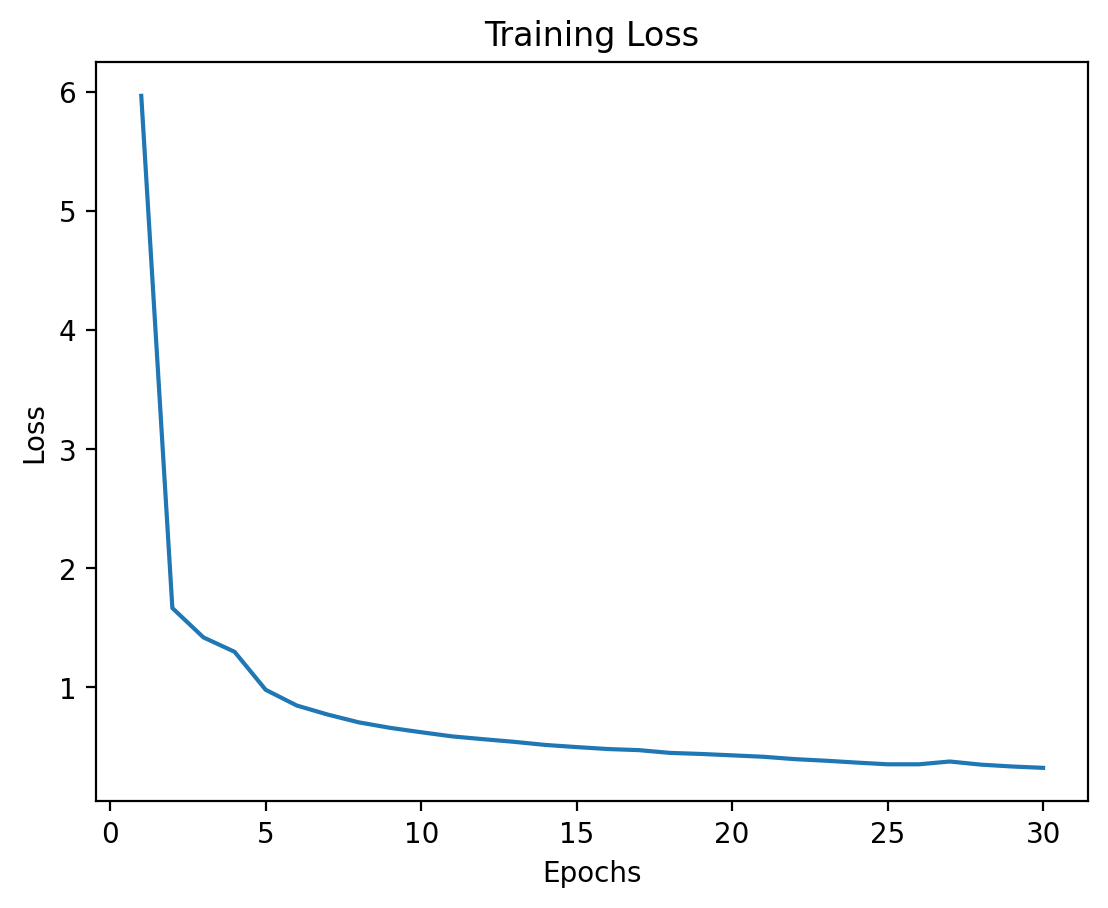

In [77]:
import matplotlib.pyplot as plt

plt.plot(range(1, epochs + 1), loss_values)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

In [78]:
# Test input
test_input = 'a romantic evening'

# Tokenize the test input
test_input_tokens = tokenizer(test_input, return_tensors='pt').to(device)

# Generate output
model.eval()
with torch.no_grad():
    test_output_tokens = model.generate(test_input_tokens['input_ids'], num_return_sequences=1)

# Convert output tokens to chords
test_output_chords = tokenizer.decode(test_output_tokens[0], skip_special_tokens=True)
print(f'Test input: "{test_input}" -> Output chords: "{test_output_chords}"')


Test input: "a romantic evening" -> Output chords: "a romantic evening a romantic evening a romantic evening a romantic evening a romantic"
